In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Data
data = [
    (20, 30), (22, 35), (25, 40), (30, 80), (32, 85),
    (35, 90), (50, 20), (52, 25), (55, 30), (40, 60),
    (42, 65), (45, 70)
]
X = np.array(data)  # Shape: (12, 2)

In [3]:
# K-means parameters
K = 3
max_iters = 100

In [5]:
#intialize centroids manually (for simplicity)
centroids = np.array([(20, 30), (30, 80), (50, 20)])


# Euclidean distance function
def euclidean_distance(p1 , p2):
    return np.sqrt(np.sum(p1 - p2) ** 2)

# K-means algorithm
clusters = np.zeros(len(X))
for _ in range(max_iters):
    #assign point nearest centroid
    old_clusters = clusters.copy()
    for i, point in enumerate(X):
        distances = [euclidean_distance(point , centroid) for centroid in centroids ] 
        clusters[i] = np.argmin(distances)

    # Update centroids
    for k in range (K):
        if np.sum(clusters == k) > 0: # avoid division by zero
            centroids[k] = np.mean(X[clusters == k], axis=0)

    # Check for convergence
    if np.array_equal(old_clusters, clusters):
        break

In [6]:
# Results
print("Final Centroids:")
for k, centroid in enumerate(centroids):
    print(f"Cluster {k+1}: {centroid}")
print("\nCluster Assignments:", clusters)

Final Centroids:
Cluster 1: [21 32]
Cluster 2: [37 75]
Cluster 3: [45 28]

Cluster Assignments: [0. 0. 2. 1. 1. 1. 2. 2. 2. 1. 1. 1.]


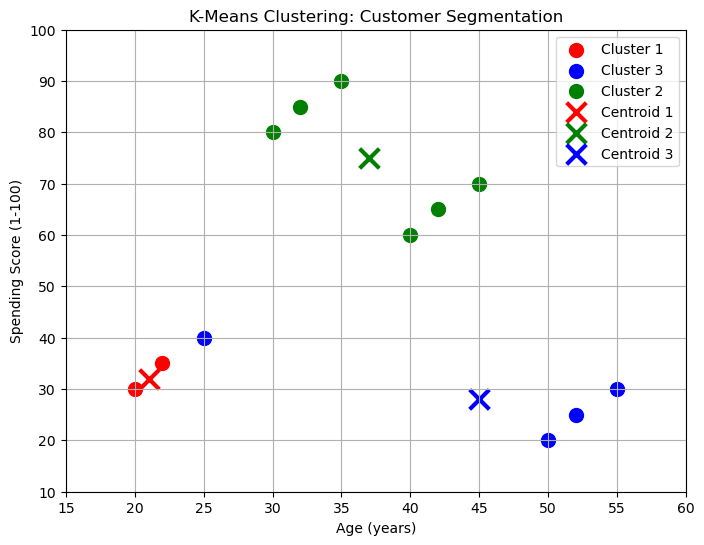

In [7]:
# Colors for clusters
colors = ['red', 'green', 'blue']

# Scatter plot of data points
plt.figure(figsize=(8, 6))
for i in range(len(X)):
    plt.scatter(X[i, 0], X[i, 1], c=colors[int(clusters[i])], label=f'Cluster {int(clusters[i])+1}' if i == np.where(clusters == clusters[i])[0][0] else "", s=100)

# Plot centroids
for k, centroid in enumerate(centroids):
    plt.scatter(centroid[0], centroid[1], c=colors[k], marker='x', s=200, linewidths=3, label=f'Centroid {k+1}')

# Customize plot
plt.xlabel('Age (years)')
plt.ylabel('Spending Score (1-100)')
plt.title('K-Means Clustering: Customer Segmentation')
plt.legend()
plt.grid(True)
plt.xlim(15, 60)
plt.ylim(10, 100)
plt.show()

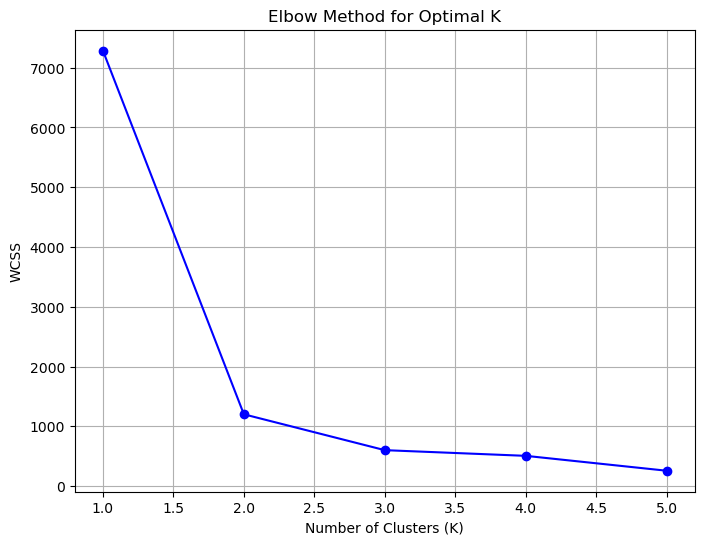

In [8]:
wcss = []
K_range = range(1, 6)
for k in K_range:
    centroids = X[np.random.choice(len(X), k, replace=False)]  # Random initialization
    clusters = np.zeros(len(X))
    for _ in range(max_iters):
        old_clusters = clusters.copy()
        for i, point in enumerate(X):
            distances = [euclidean_distance(point, centroid) for centroid in centroids]
            clusters[i] = np.argmin(distances)
        for j in range(k):
            if np.sum(clusters == j) > 0:
                centroids[j] = np.mean(X[clusters == j], axis=0)
        if np.all(old_clusters == clusters):
            break
    wcss_k = sum([euclidean_distance(X[i], centroids[int(clusters[i])])**2 for i in range(len(X))])
    wcss.append(wcss_k)

# Plot elbow curve
plt.figure(figsize=(8, 6))
plt.plot(K_range, wcss, 'bo-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal K')
plt.grid(True)
plt.show()

Cluster Assignments: [2 2 2 0 0 0 1 1 1 0 0 0]

Centroids (in original scale):
Cluster 1: Age = 37.33, Spending Score = 75.00
Cluster 2: Age = 52.33, Spending Score = 25.00
Cluster 3: Age = 22.33, Spending Score = 35.00


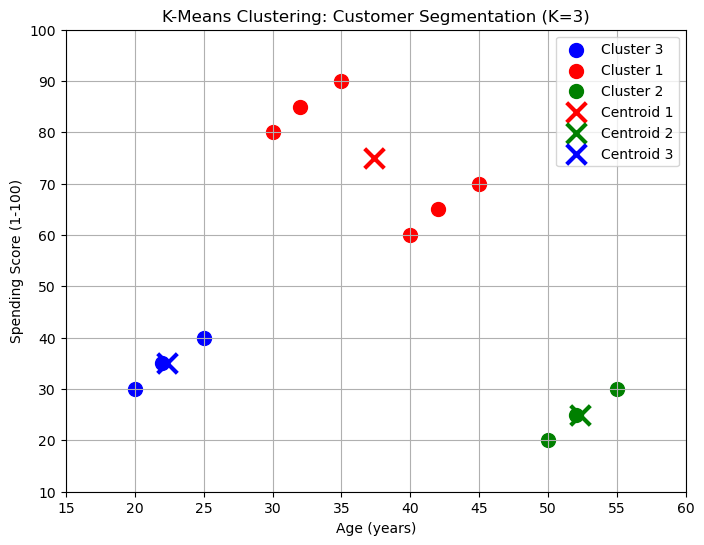

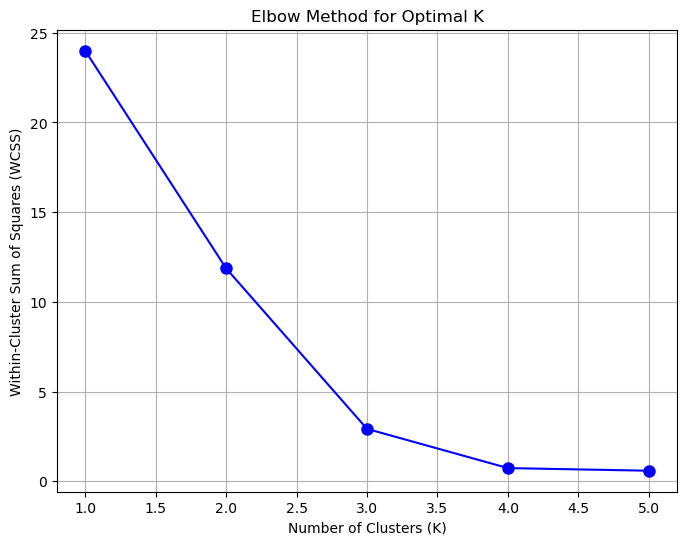

In [9]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-means with K=3
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans.fit(X_scaled)
labels = kmeans.labels_  # Cluster assignments
centroids = scaler.inverse_transform(kmeans.cluster_centers_)  # Transform centroids back to original scale

# Print results
print("Cluster Assignments:", labels)
print("\nCentroids (in original scale):")
for i, centroid in enumerate(centroids):
    print(f"Cluster {i+1}: Age = {centroid[0]:.2f}, Spending Score = {centroid[1]:.2f}")

# Visualize clusters and centroids
plt.figure(figsize=(8, 6))
colors = ['red', 'green', 'blue']
for i in range(len(X)):
    plt.scatter(X[i, 0], X[i, 1], c=colors[labels[i]], label=f'Cluster {labels[i]+1}' if i == np.where(labels == labels[i])[0][0] else "", s=100)
for i, centroid in enumerate(centroids):
    plt.scatter(centroid[0], centroid[1], c=colors[i], marker='x', s=200, linewidths=3, label=f'Centroid {i+1}')

plt.xlabel('Age (years)')
plt.ylabel('Spending Score (1-100)')
plt.title('K-Means Clustering: Customer Segmentation (K=3)')
plt.legend()
plt.grid(True)
plt.xlim(15, 60)
plt.ylim(10, 100)
plt.show()

# Elbow method to choose K
wcss = []
K_range = range(1, 6)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot elbow curve
plt.figure(figsize=(8, 6))
plt.plot(K_range, wcss, 'bo-', markersize=8)
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal K')
plt.grid(True)
plt.show()